**Regresión lineal con Aguacates**

Importaciones

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

Lectura de datos

In [7]:
df= pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


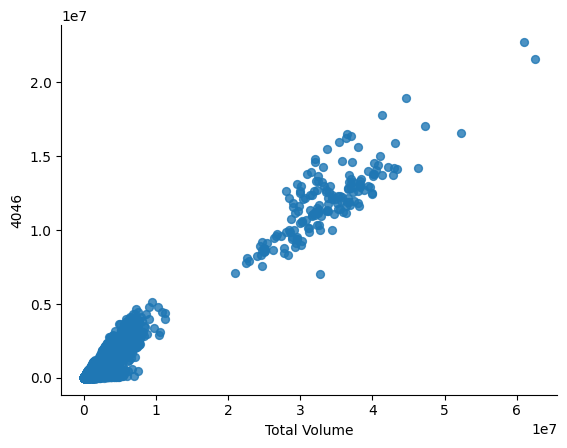

In [8]:
# @title Total Volume vs Plu 4046

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Total Volume', y='4046', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

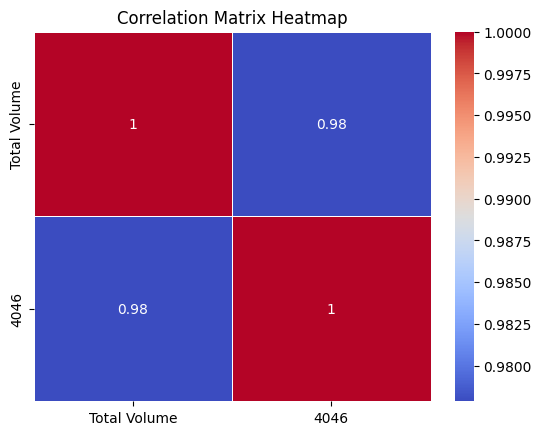

In [9]:
df_subset = df[['Total Volume','4046']]

correlation_matrix = df_subset.corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [10]:
X = df_subset[['Total Volume']]
Y = df_subset['4046']

División del conjunto de entrenamiento y prueba

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

Entrenar el modelo

In [12]:
model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

Hacer predicciones

In [13]:
Y_pred = model.predict(X_test)

Evaluación del modelo

In [17]:
# Error Cuadrático Medio (MSE)
mse = mean_squared_error(Y_test, Y_pred) # Raiz cuadradra
mse_sqrt = np.sqrt(mse)
print(f'Raiz del Error Cuadrático Medio (MSE): {mse_sqrt}')

# Calcular el coeficiente de determinación (R^2)
r2 = r2_score(Y_test, Y_pred)
print(f'Coeficiente de Determinación (R^2): {r2}')


# Error absoluto
error_absoluto = np.abs(Y_test - Y_pred)
print("Error Absoluto:", error_absoluto)


# Error relativo
error_relativo = np.abs(Y_test - Y_pred) / Y_test
print("Error Relativo:", error_relativo)

Raiz del Error Cuadrático Medio (MSE): 270041.5084622417
Coeficiente de Determinación (R^2): 0.9601751290653028
Error Absoluto: 9181      12348.227993
1013      51206.249591
14625    258788.870105
15234      9329.079104
18247      8266.749786
             ...      
887       69552.396301
4424       9616.249755
4720      97813.469040
4159     380976.628934
8902     130436.858573
Name: 4046, Length: 6023, dtype: float64
Error Relativo: 9181      9.089404
1013     10.470919
14625     2.463036
15234    29.734117
18247     5.411487
           ...    
887      16.288961
4424      0.125291
4720      1.086939
4159      0.564324
8902      0.148271
Name: 4046, Length: 6023, dtype: float64


**Distribución del error**

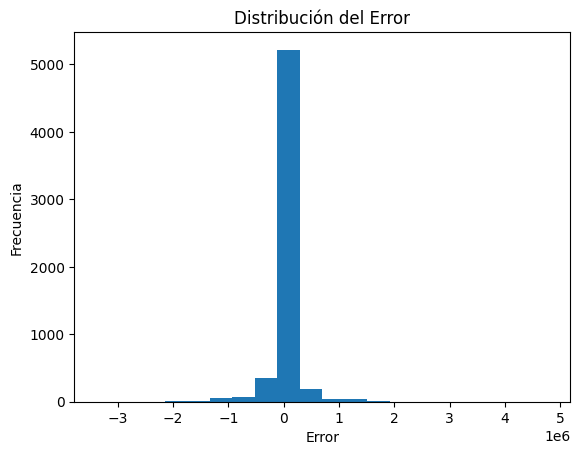

In [18]:
Y_pred = model.predict(X_test)
error = Y_pred - Y_test
plt.hist(error, bins=20)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución del Error')
plt.show()

Visualización de los resultados

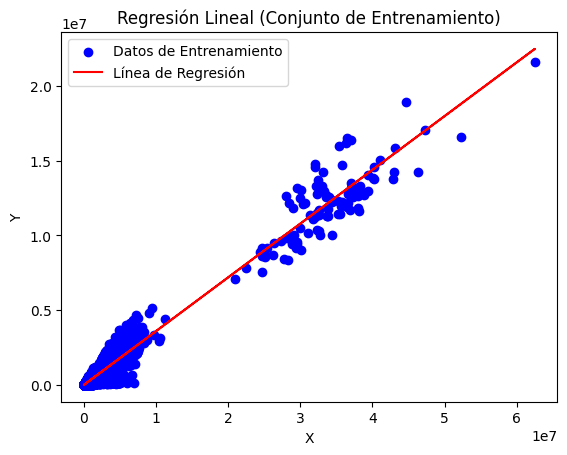

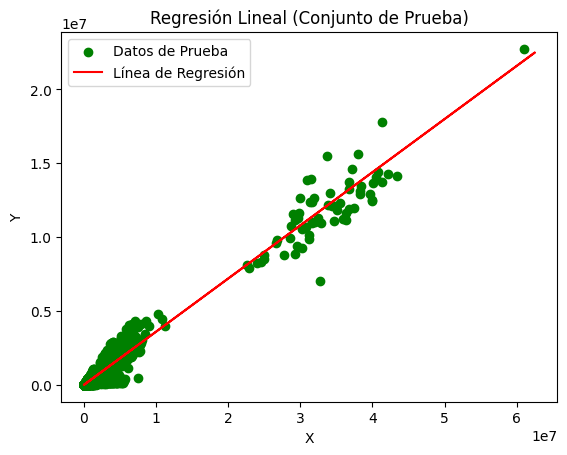

In [15]:
# Visualizar los resultados del conjunto de entrenamiento
plt.scatter(X_train, Y_train, color='blue', label='Datos de Entrenamiento')
plt.plot(X_train, model.predict(X_train), color='red', label='Línea de Regresión')
plt.title('Regresión Lineal (Conjunto de Entrenamiento)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Visualizar los resultados del conjunto de prueba
plt.scatter(X_test, Y_test, color='green', label='Datos de Prueba')
plt.plot(X_train, model.predict(X_train), color='red', label='Línea de Regresión')
plt.title('Regresión Lineal (Conjunto de Prueba)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()